# Unit 3

In [1]:
# Define path for files
path = r"C:\Users\cramb\OneDrive\Desktop\Bootcamp25\Images\\"

## Probability
### Discrete Random Variables

In [6]:
import numpy as np
from scipy.stats import binom

# Generate 100,000 simulations
defaults = binom.rvs(n = 25, p = 0.05, loc = 0, size = 100_000, random_state = 0)

# Calculate probability
prob = np.mean(defaults > 1)

print(f'The probability that more than one bond defaults is {prob:.3f}.')

The probability that more than one bond defaults is 0.357.


### Continuous Random Variables

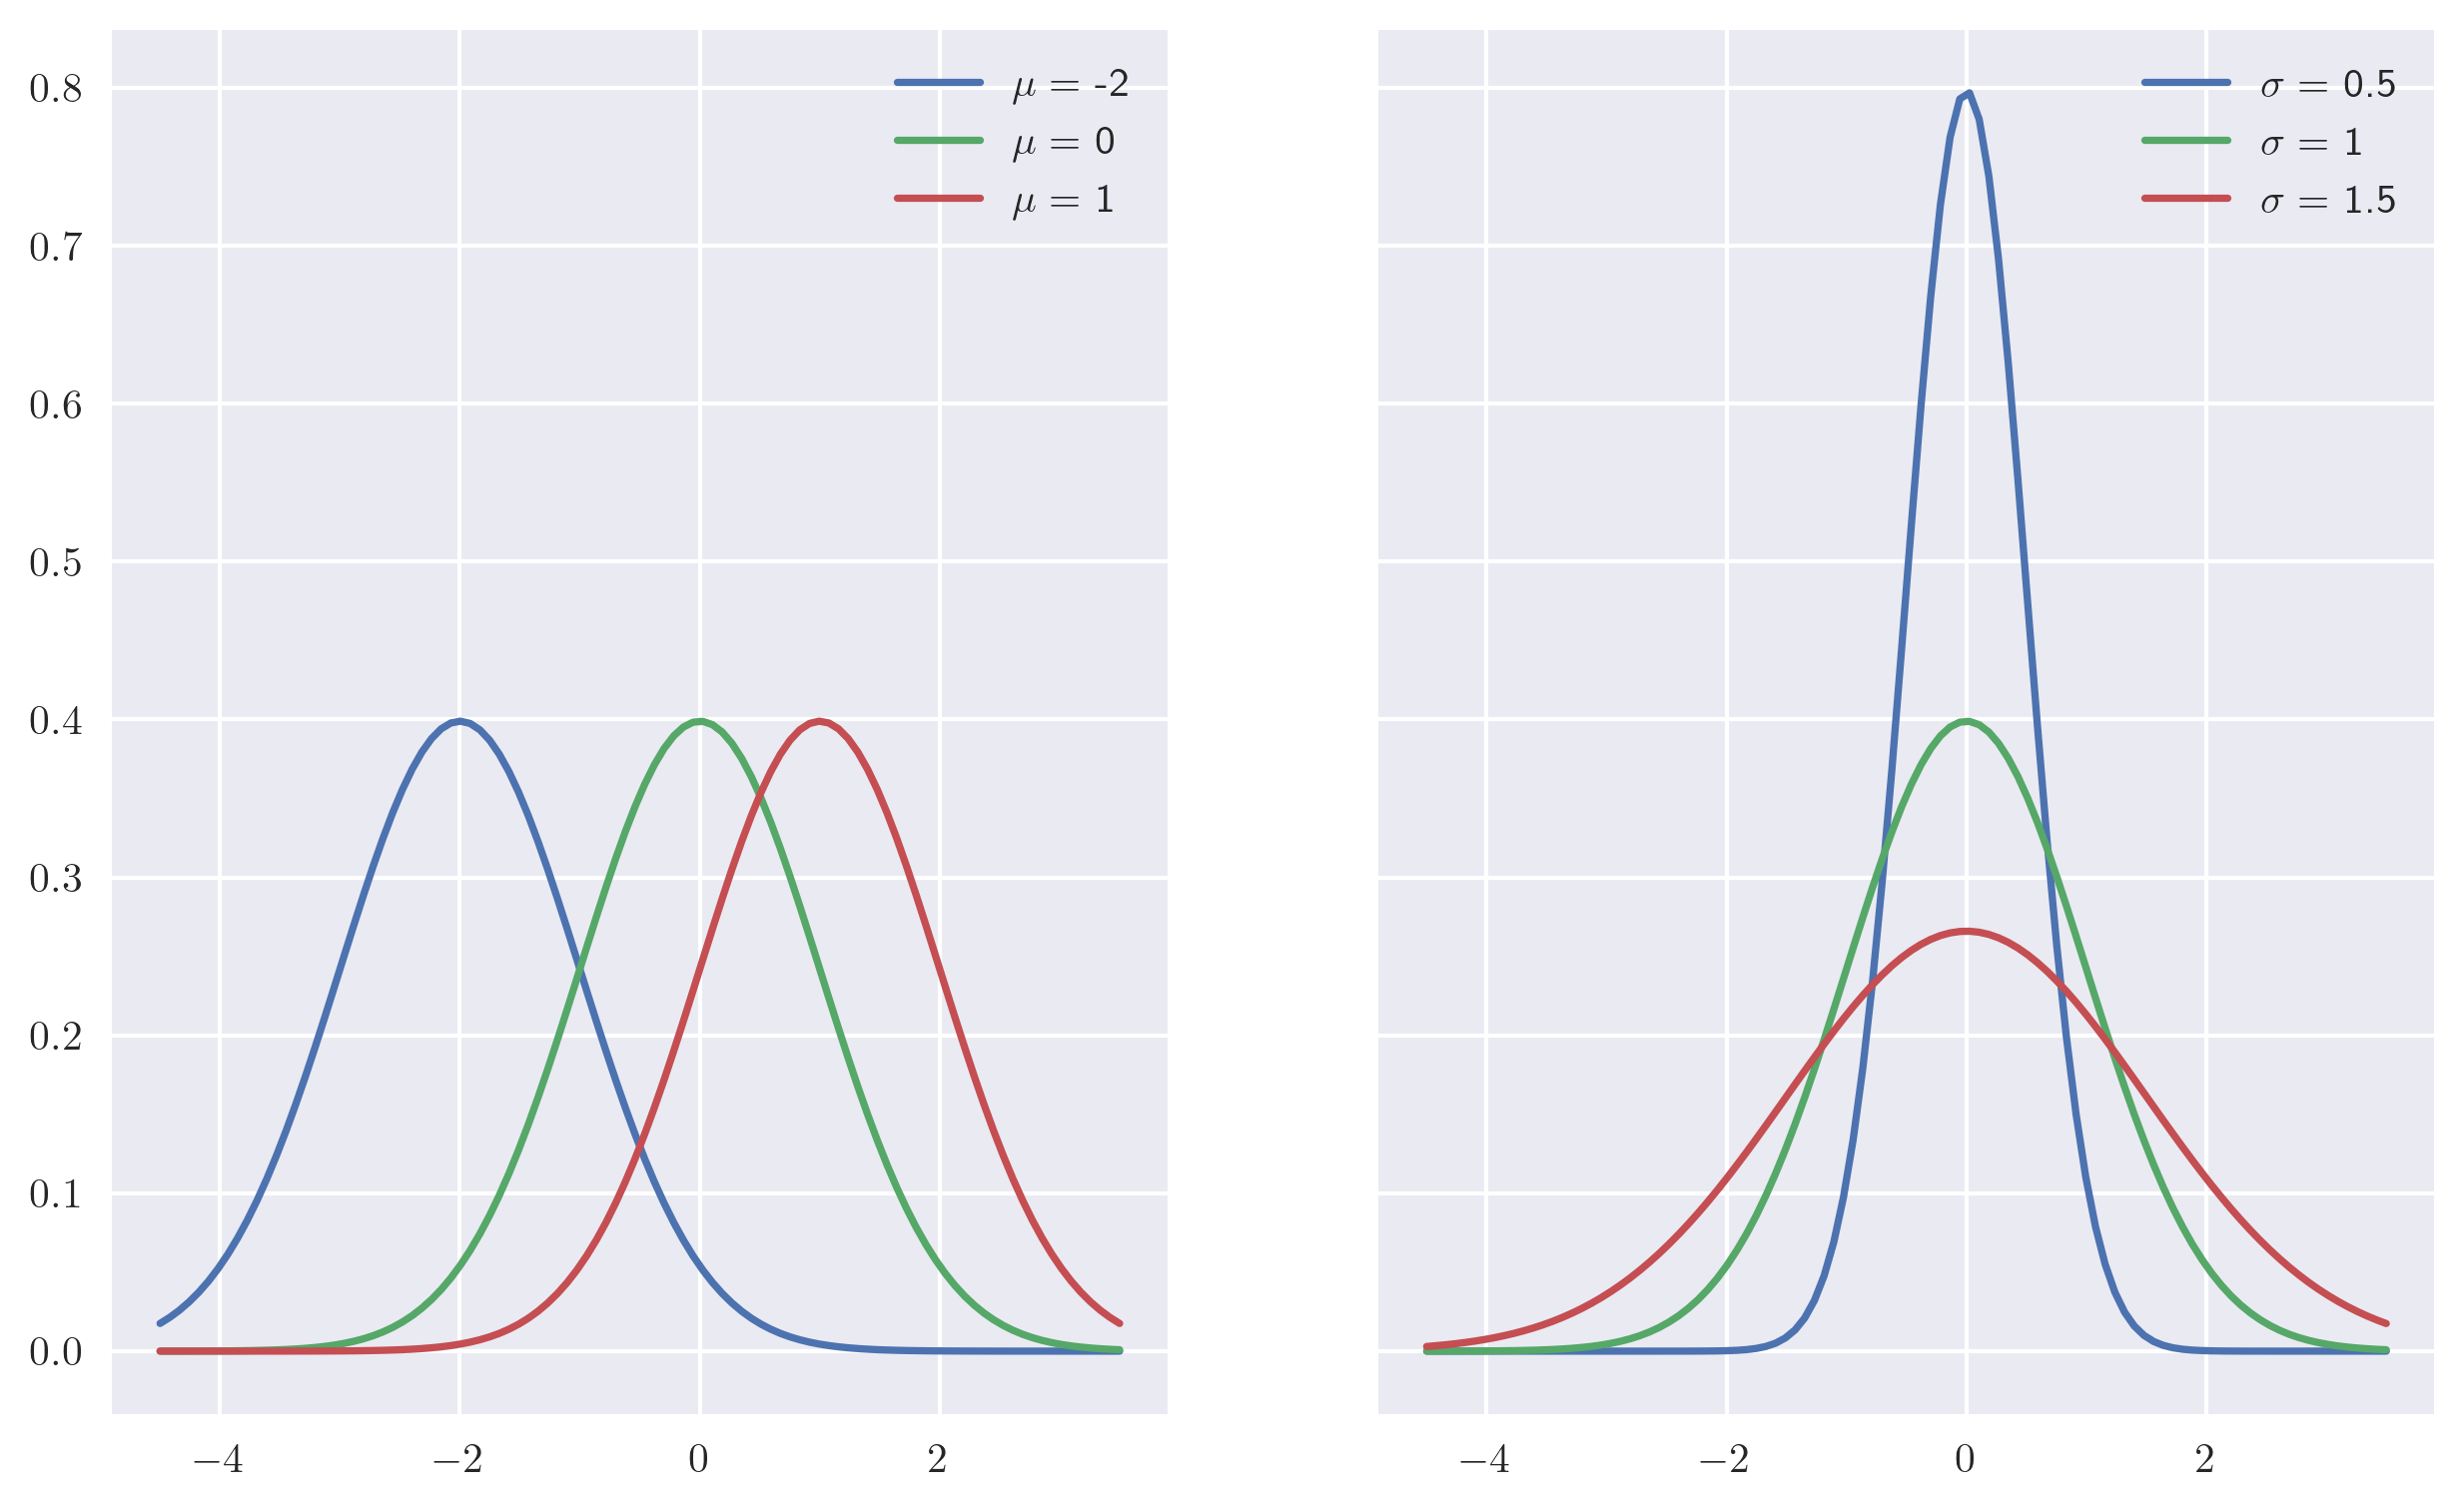

In [9]:
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Mu- and sigma-values
mu_vals, sigma_vals = [-2, 0, 1], [0.5, 1, 1.5]

# Set up subplots
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))

# Get x-values
x_vals = np.linspace(-4.5, 3.5, 100)

# Loop over mu-values
for mu in mu_vals:

    # Note norm.pdf vectorized
    y_vals = norm.pdf(x_vals, loc = mu, scale = 1)
    
    ax[0].plot(x_vals, y_vals, label = r'$\mu =$ ' + str(mu))

# Create legend for first subplot
ax[0].legend()

# Loop over sigma-values
for sigma in sigma_vals:
    
    # Note norm.pdf vectorized; also scale is std not var
    y_vals = norm.pdf(x_vals, loc = 0, scale = sigma)
    
    ax[1].plot(x_vals, y_vals, label = r'$\sigma =$ ' + str(sigma))

# Create legend for second subplot
ax[1].legend()

# Save the figure
plt.savefig(path + r'ex3-1.png')

# Show plot
plt.show()

### Functions of a Random Variable

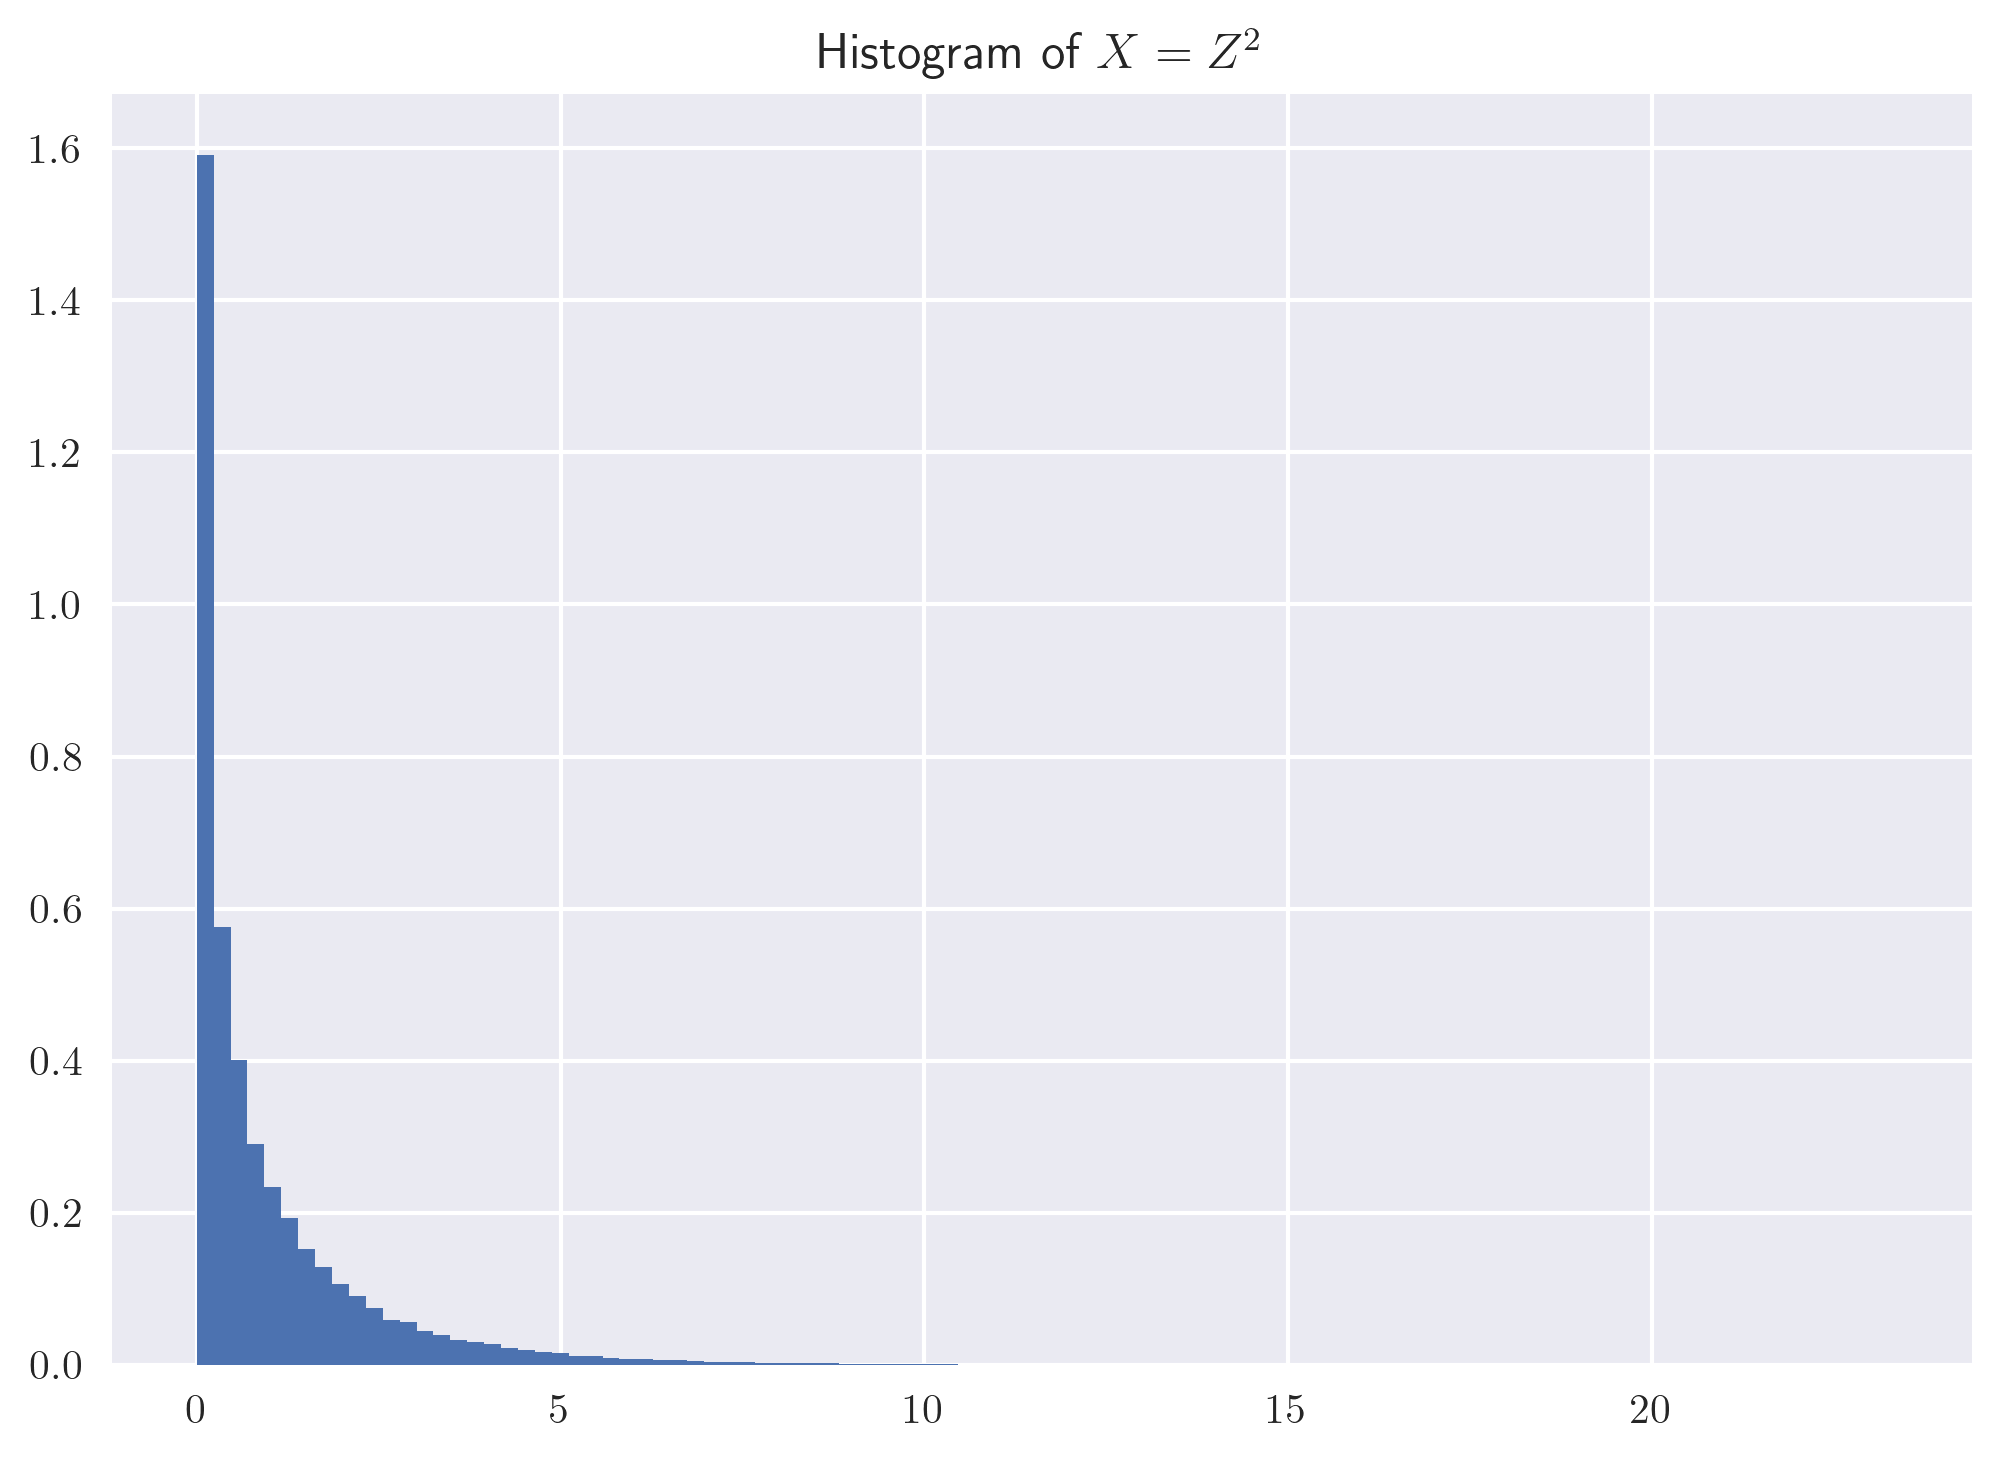

In [11]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Generate Z
Z = norm.rvs(size = 100_000)

# Calculate X
X = Z**2

# Generate histogram; make sure density is True
plt.hist(X, bins = 100, density = True)

# Get title 
plt.title(r'Histogram of $X = Z^2$')

# Save the figure
plt.savefig(path + r'ex3-2.png')

plt.show()

### Joint Distributions

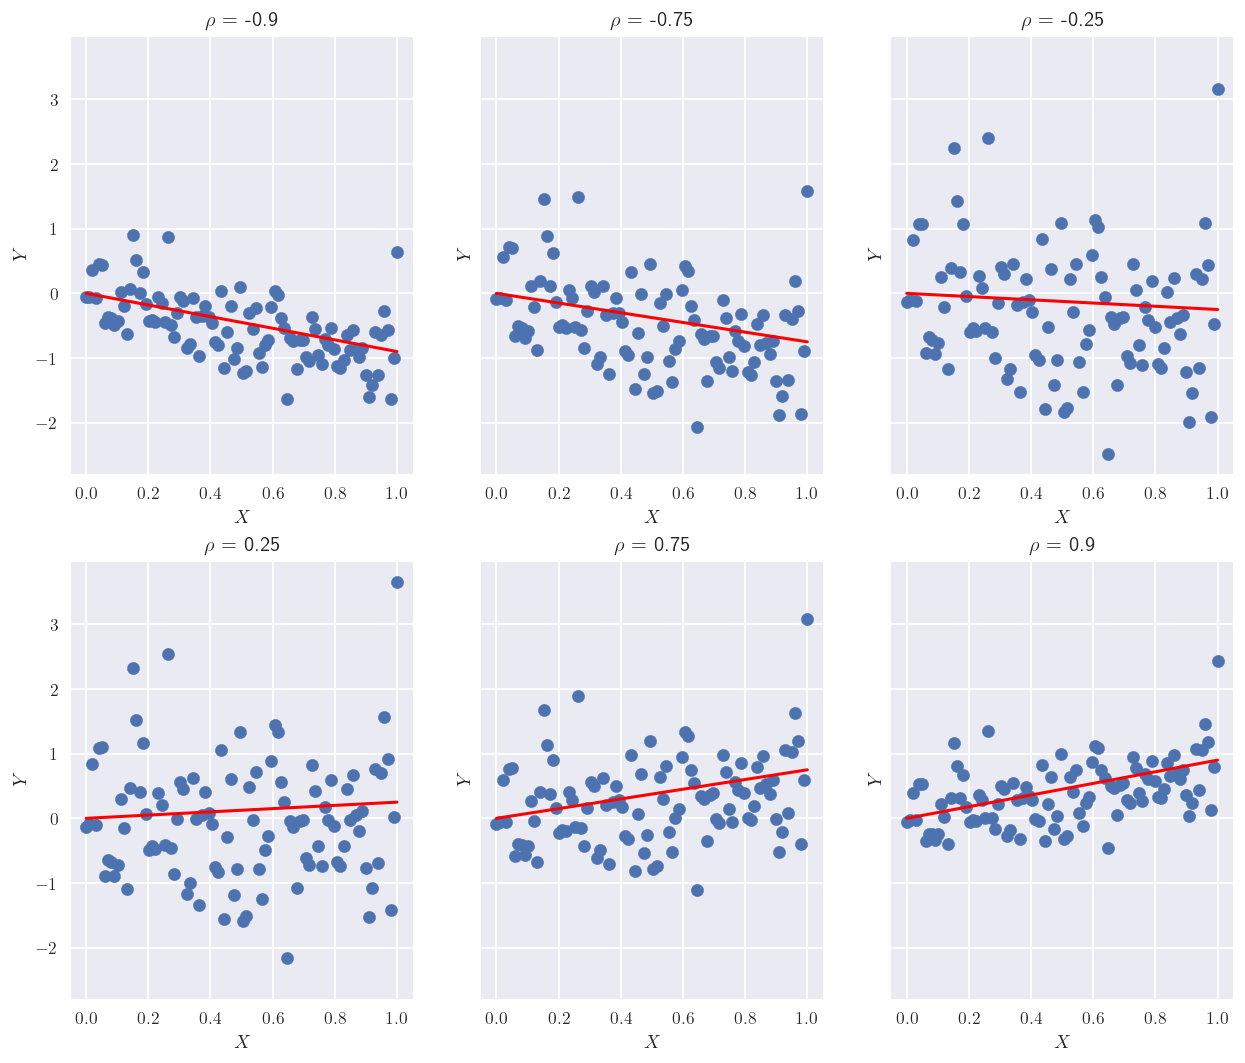

In [13]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Generate standard normals
Z = norm.rvs(size = 100)

# List correlations
rho_vals = [-0.9, -0.75, -0.25, 0.25, 0.75, 0.9]

# Set up subplots
fig, ax = plt.subplots(2, 3, sharey = True, 
                       figsize = (12, 10), dpi = 125)

for i, rho in enumerate(rho_vals):
    
    # Get X and Y values
    X = np.linspace(0, 1, len(Z))
    Y = rho * X + np.sqrt(1 - rho**2) * Z
    
    # Get row and column
    row, col = i//3, i%3
    
    # Draw scatter plot
    ax[row, col].scatter(X, Y)
    
    # Draw plot of underlying relationship
    ax[row, col].plot(X, rho * X, color = 'red')
    
    # Add title to subplot
    ax[row, col].set_title(r'$\rho$ = ' + str(rho))
    
    # Add labels for x and y axes
    ax[row, col].set_xlabel(r'$X$')
    ax[row, col].set_ylabel(r'$Y$')
    
# Save the figure
plt.savefig(path + r'ex3-3.png')

plt.show()
    

### Portfolio Construction

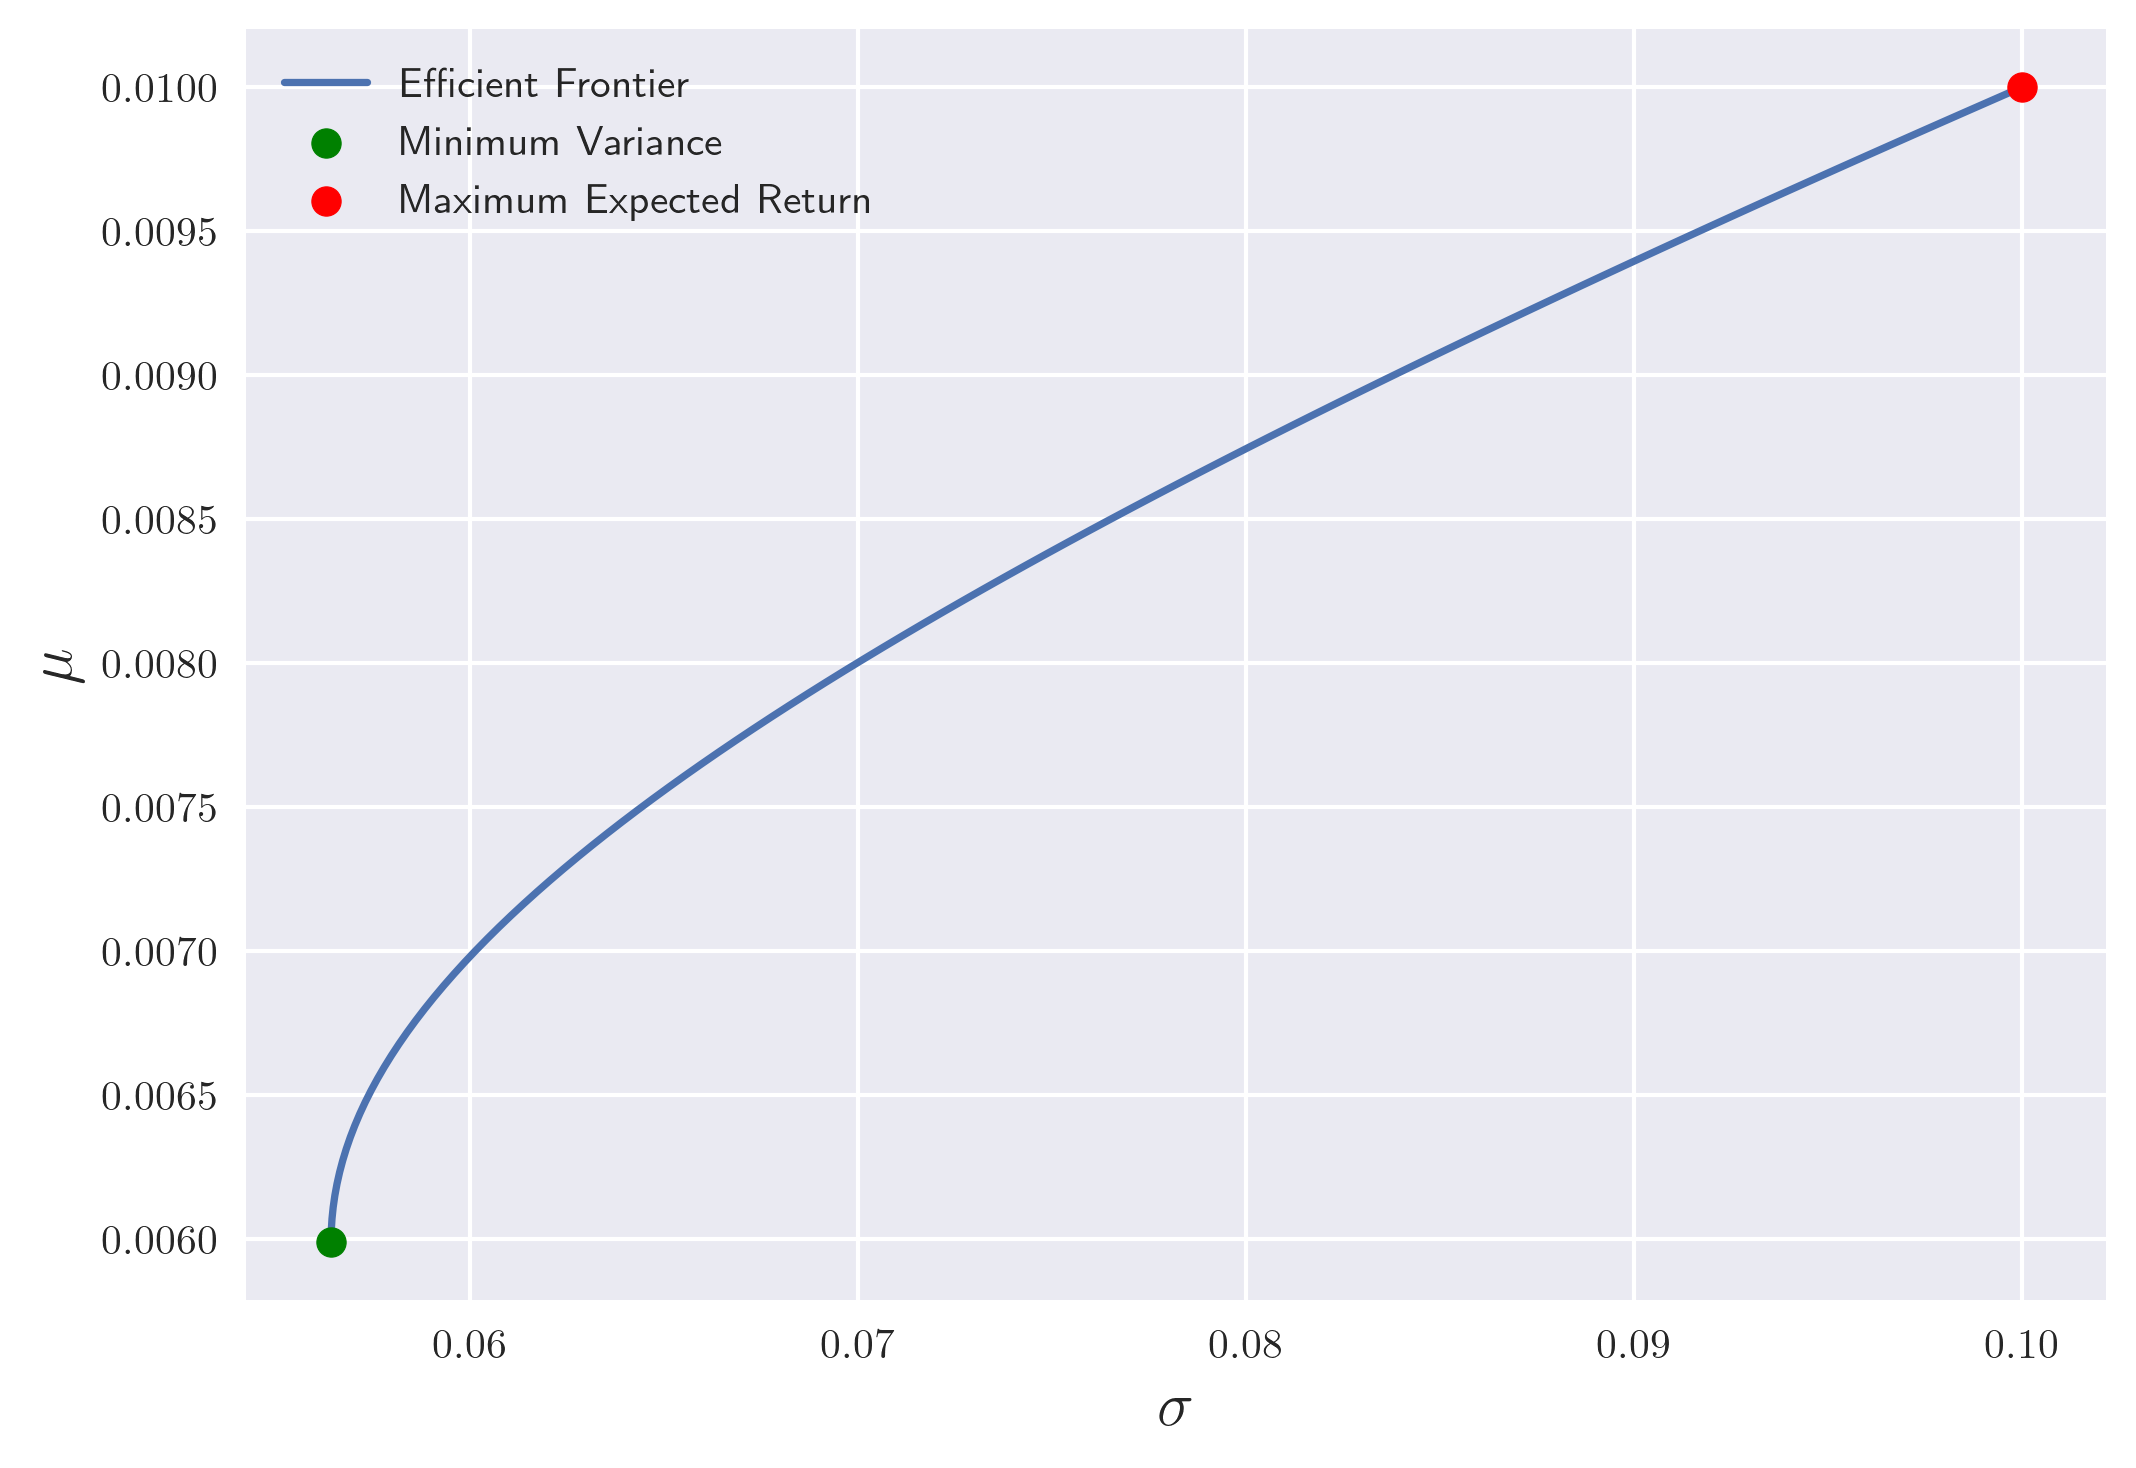

The minimum variance portfolio has respective weights in assets 1 and 2 of 19.8% and 80.2%. The standard deviation of the minimum variance portfolio is 5.6%.


In [40]:
# Import modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Define expected returns
mu1, mu2 = 0.01, 0.005

# Define standard deviations
sigma1, sigma2 = 0.10, 0.06

# Define correlation
rho = 0.25

# Create function for portfolio expected return
def port_mu(w):
    
    return mu1 * w + mu2 * (1 - w)

# Create function for portfolio standard deviations
def port_sigma(w):
    
    # Calculate variance...
    
    # ... uncorrelated variance
    var = w**2 * sigma1**2 + (1 - w)**2 * sigma2**2 
    
    # ... variance due to correlation
    var +=  2 * w * (1 - w) * rho * sigma1 * sigma2
    
    # Take square root to obtain standard deviation
    return np.sqrt(var)

# Get weights for minimum variance portfolio; no short positions
w_min_var = minimize_scalar(port_sigma, bounds = (0, 1), 
                            method = 'bounded').x

# Define number of samples
samples = 100

# Create data frame to save results
port_results = pd.DataFrame(index = range(samples), 
                            columns = ['mu', 'sigma'])

# Get weights to loop over
wt_vals = np.linspace(w_min_var, 1.0, samples)

# Calculate efficient frontier
for i, w in enumerate(wt_vals):
    
    # Calculate expected return
    mu = port_mu(w)
    
    # Calculate standard deviation
    sigma = port_sigma(w)
    
    # Save results
    port_results.loc[i, ['mu', 'sigma']] = mu, sigma
    

# Plot efficient frontier
plt.plot(port_results['sigma'], port_results['mu'], 
         label = 'Efficient Frontier')

# Add dot for minimum variance portfolio
plt.scatter(port_results.loc[0, 'sigma'], port_results.loc[0, 'mu'], 
            label = 'Minimum Variance', color = 'green',
            zorder = 3)

# Add dot for maximum expected return
plt.scatter(port_results.loc[samples - 1, 'sigma'], 
            port_results.loc[samples - 1, 'mu'], 
            label = 'Maximum Expected Return', color = 'red',
            zorder = 3)

# Add legend
plt.legend()

# Add x-label
plt.xlabel(r'$\sigma$', fontsize = 15)

# Add y-label
plt.ylabel(r'$\mu$', fontsize = 15)

# Save the figure
plt.savefig(path + r'ex3-4.png')

plt.show()

print(r'The minimum variance portfolio has respective weights in', 
      r'assets 1 and 2 of', 
      f'{100 * w_min_var:.1f}% and {100 - 100 * w_min_var:.1f}%.',
     f'The standard deviation of the minimum variance portfolio is {100 * port_sigma(w_min_var):.1f}%.')
      

## Statistics
### Law of Large Numbers

This program took 15.466 seconds.


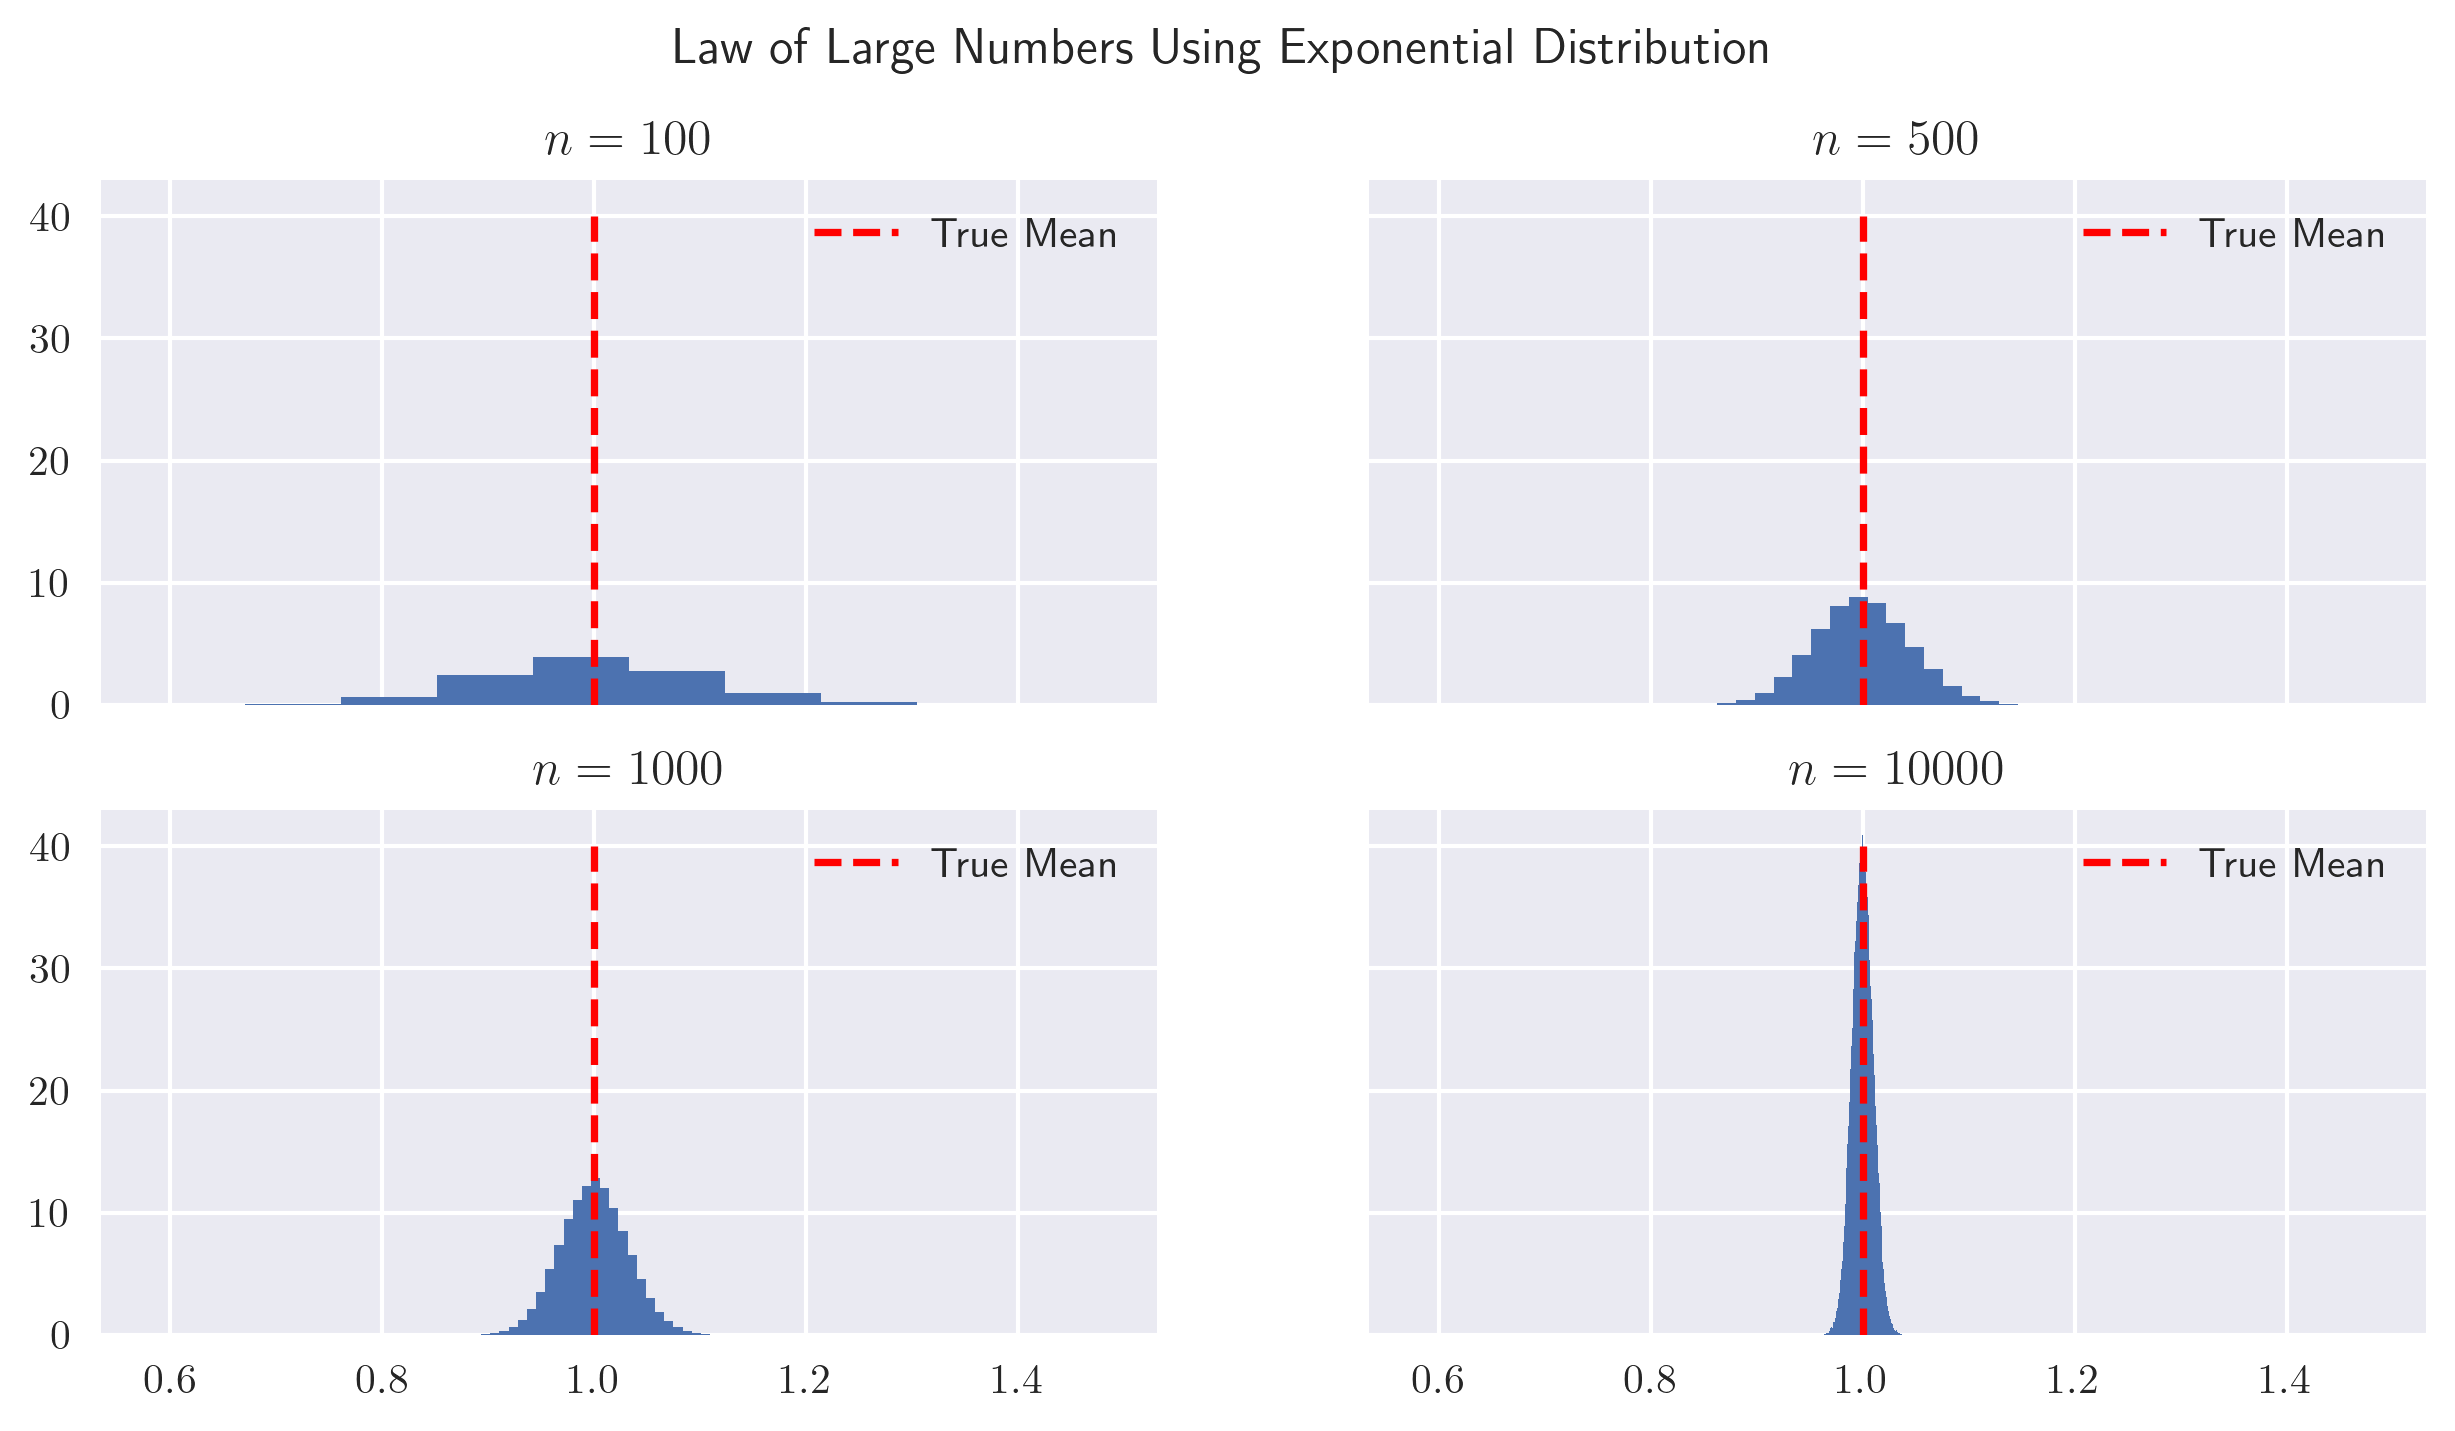

In [19]:
# Import modules
import numpy as np, matplotlib.pyplot as plt, time
from scipy.stats import expon

# Start the clock!
start_time = time.perf_counter()

# Set random seed
np.random.seed(0)

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'], plt.rcParams['figure.dpi'] = True, 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Choose n-values and set number of trials
n_vals, trials = [100, 500, 1000, 10_000], 100_000

# Set up subplots
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, 
                       figsize = (10, 5), dpi = 300)

for i, n in enumerate(n_vals):

    # Get row and column
    nrow, ncol = i // 2, i % 2
    
    # Generate numbers of dimension trails x n
    # Scale is 1/lambda; default is 1 so unnecessary
    X = expon.rvs(scale = 1/1, size = (trials, n))  
    
    # Take mean of each row and make histogram
    ax[nrow, ncol].hist(X.mean(axis = 1), bins = int(np.sqrt(n)), density = True)
    
    ax[nrow, ncol].vlines(x = 1, ymin = 0, ymax = 40, linestyle = 'dashed', 
                 color = 'red', label = 'True Mean')
    
    # Give each histogram a title
    ax[nrow, ncol].title.set_text(f'$n = {n}$')
    
    # Add legend
    ax[nrow, ncol].legend()

# Clear up a little RAM
del X

# Give the entire figure a title
fig.suptitle('Law of Large Numbers Using Exponential Distribution')

# Save the figure
plt.savefig(path + r'ex3-5.png')

plt.plot()

# When my programs run slowly, I like to monitor the time it takes
print(f'This program took {time.perf_counter() - start_time:.3f} seconds.')

### Empirical CDFs

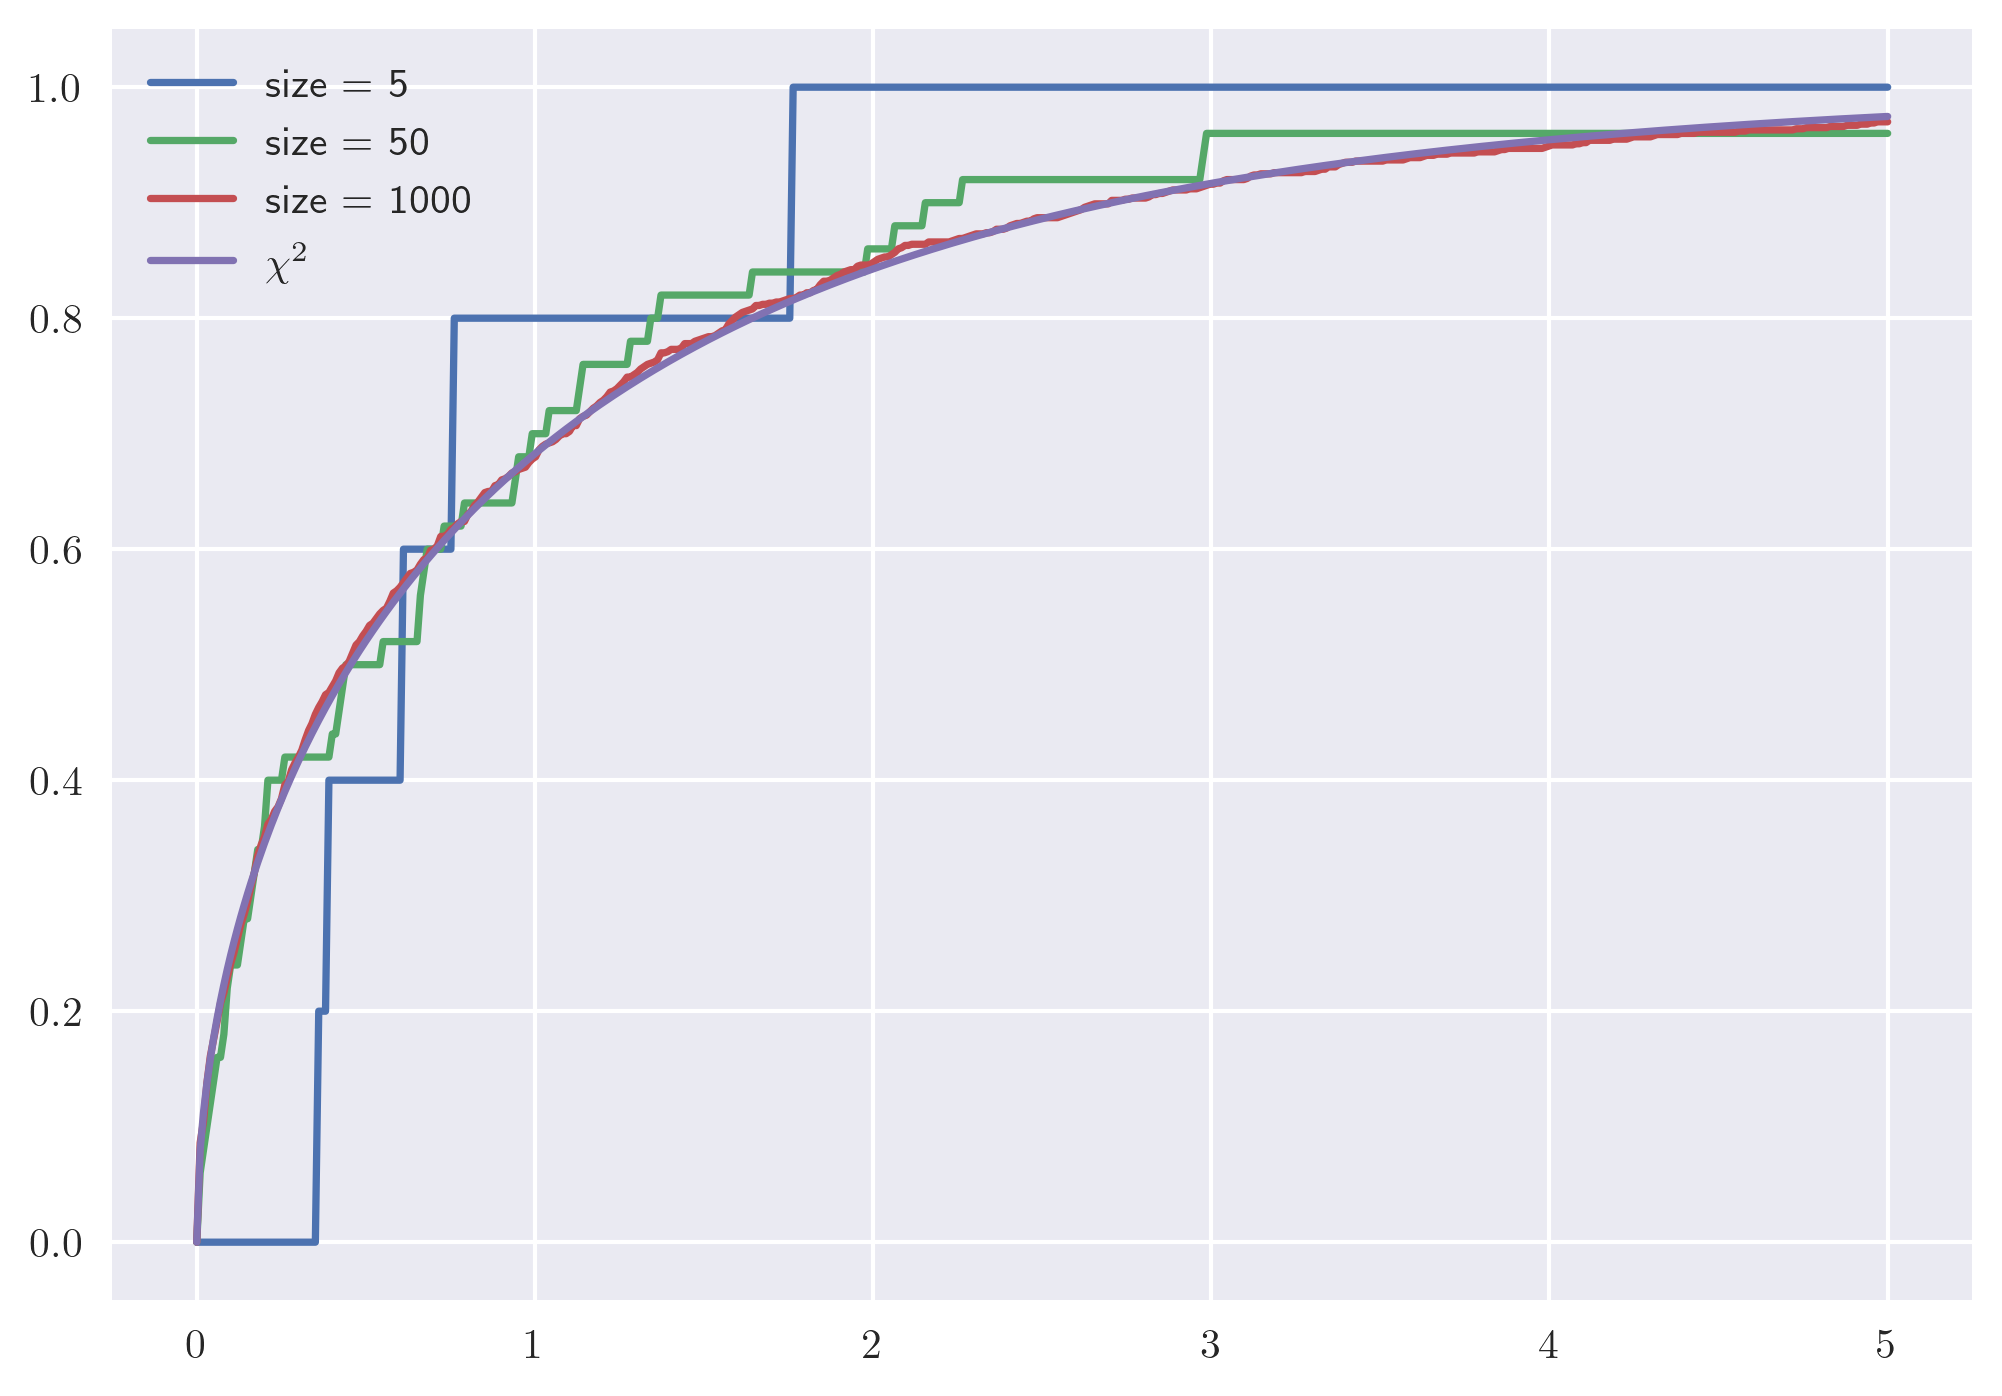

In [25]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import chi2, ecdf

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'],  plt.rcParams['figure.dpi'] = True, 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Set random seed
np.random.seed(0)

# Create empirical cdf
ecdf = lambda x, sample: np.mean(sample <= x)

# List of sample sizes
sample_sizes = [5, 50, 1000]

# Create x-values for plot
x_vals = np.linspace(0, 5, 500)

# Loop over the sample sizes
for sample_size in sample_sizes:
    
    # Generate sample
    sample = chi2.rvs(df = 1, size = sample_size)
    
    # Get the y-values
    y_vals = [ecdf(x, sample) for x in x_vals]
    
    # Plot values
    plt.plot(x_vals, y_vals, label = f'size = {sample_size}')

# Get y-values; function vectorized
y_vals = chi2.cdf(x_vals, df = 1)

# Plot standard normal cdf
plt.plot(x_vals, y_vals, label = r'$\chi^2$')

# Clear up RAM
del data, x_vals, y_vals

# Show legend
plt.legend()

# Save the figure
plt.savefig(path + r'ex3-6.png')

plt.show()

### Central Limit Theorem

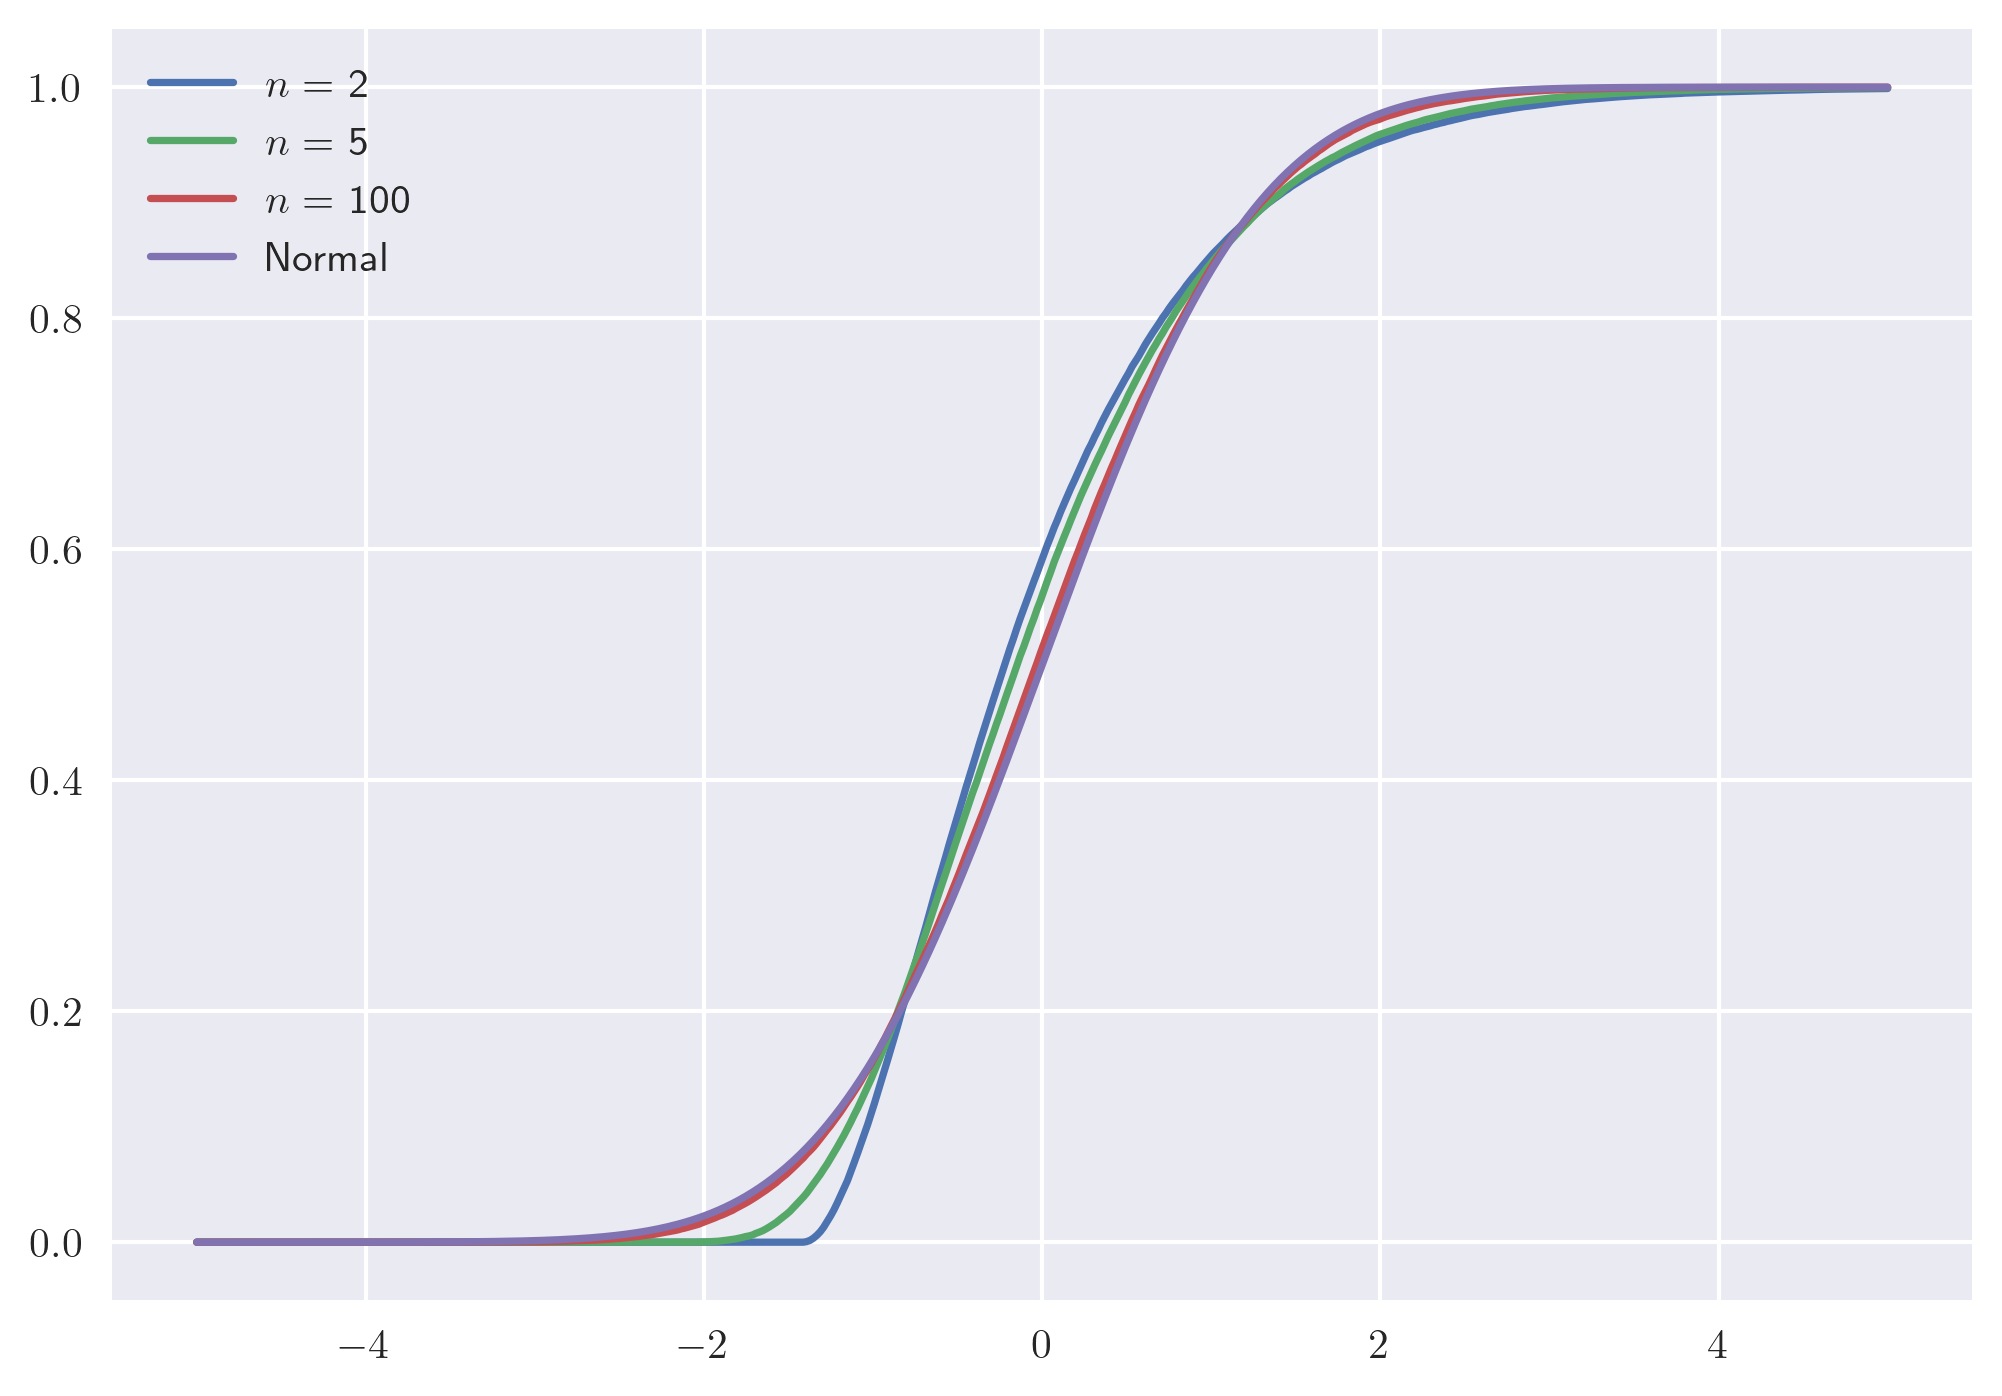

In [29]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import expon, norm

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'],  plt.rcParams['figure.dpi'] = True, 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Set random seed
np.random.seed(0)

# Create empirical cdf
ecdf = lambda x, sample: np.mean(sample <= x)

# Create x-values for plot
x_vals = np.linspace(-5, 5, 500)

# Create n_values
n_vals = [2, 5, 100]

# Let's do 100,000 trials
trials = 100_000

# Scale is 1/lambda
lam = 1

# Loop over the n-values
for n in n_vals:
    
    # Generate the sample; mean is 1/lam and std is 1/lam
    sample =  expon.rvs(scale = 1/lam, size = (trials, n)).mean(axis = 1)
    
    # Change sample so it has mean 0 and sd 1; current mean 1/lam and sd 1/(lam * sqrt(n))
    sample = np.sqrt(n)/(1/lam) * (sample - 1/lam)
    
    # Get y-values
    y_vals = [ecdf(x, sample) for x in x_vals]
    
    # Plot values
    plt.plot(x_vals, y_vals, label = f'$n =$ {n}')

# Get y-values
y_vals = norm.cdf(x_vals)

# Plot standard normal cdf
plt.plot(x_vals, y_vals, label = 'Normal')

# Show legend
plt.legend()

# Save the figure
plt.savefig(path + r'ex3-7.png')

plt.show()

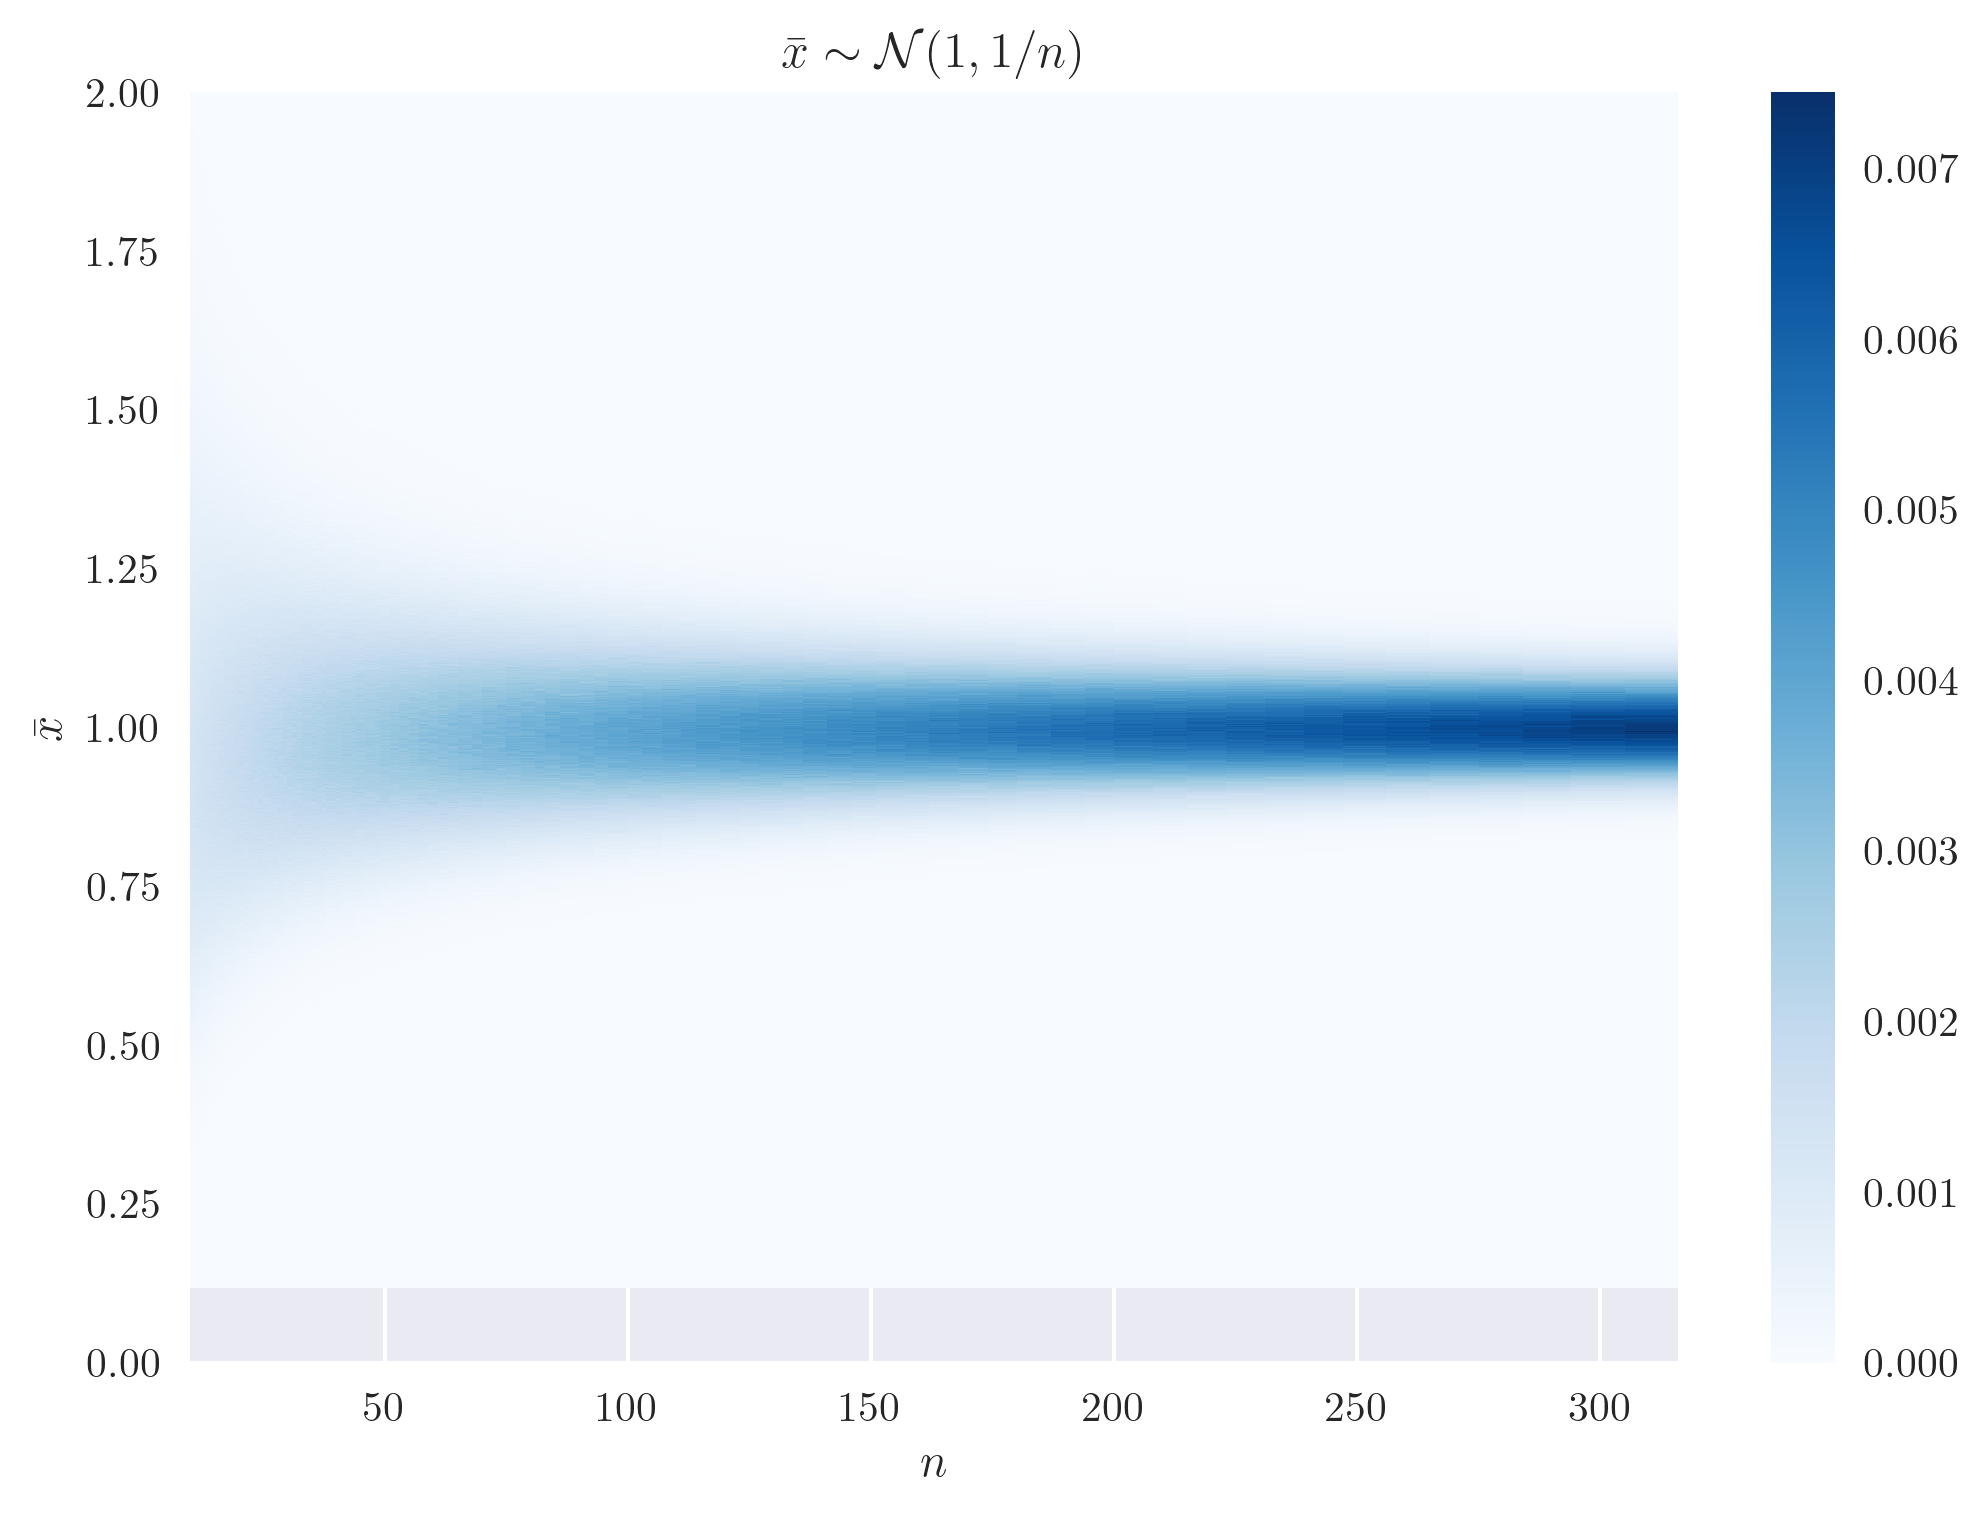

This program took 1.64 minutes.


In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Start the clock
start_time = time.perf_counter()

# Get array of n values to use; repeats at beginning fine
# Good to sample higher variance part more
num_vals = np.logspace(1, 2.5, 100).astype(int)

# Define number of runs
num_runs = 500_000

# Initialize list to hold exprimental values
exprimental_values = []

for n in num_vals:
        
    # Generate exponential values and take the average of columns
    dist = stats.expon.rvs(size = (n, num_runs)).mean(axis = 0)
    
    # Add column to denote n used in average
    result = np.concatenate([np.repeat(n, num_runs).reshape(1, -1), 
                             dist.reshape(1, -1)], axis = 0).T
        
    # Record results
    exprimental_values.extend(result)
        
# Convert to a pandas data frame
exprimental_values = pd.DataFrame(exprimental_values, columns = ['num', 'mean'])

# Rework so we get normalized frequencies
exprimental_values['count'] = 1

# Discretize mean
exprimental_values['mean'] = exprimental_values['mean'].round(3)

# Count number of elements in each bin
exprimental_values = exprimental_values.groupby(['num', 'mean'])['count'].sum().reset_index()

# Rows are the mean, columns are the number of elements averaged, entry is the count
exprimental_values = exprimental_values.pivot(index = 'mean', columns = 'num', values = 'count') 

# Fill empty values with zero
exprimental_values= exprimental_values.fillna(0)

# Divide by the sum of the column      
exprimental_values = exprimental_values.div(exprimental_values.sum(axis = 0), axis = 1)

# Sort values
exprimental_values = exprimental_values.sort_index(ascending = False)

# Get figure and axes
fig, ax = plt.subplots()

# Convert to grid
X, Y = np.meshgrid(exprimental_values.columns, exprimental_values.index)

# Get the frequency numbers
Z = exprimental_values.values[1:, 1:]

# Generate the pcolormesh
c = ax.pcolormesh(X, Y, Z, cmap = 'Blues')

# Add a color bar
fig.colorbar(c, ax = ax)

# Add a title
ax.set_title(r'$\bar{x}\sim{\mathcal{N}(1, 1/n)}$')

# Add axis labels
ax.set_xlabel('$n$')
ax.set_ylabel(r'$\bar{x}$')

# Set y limits
ax.set_ylim(0, 2)

# Show the figure
plt.show()

# Clear up RAM
del exprimental_values, X, Y, Z

# I like to monitor how long it takes slow code to run
print(f'This program took {(time.perf_counter() - start_time)/60:0.2f} minutes.')

### Hypothesis Testing

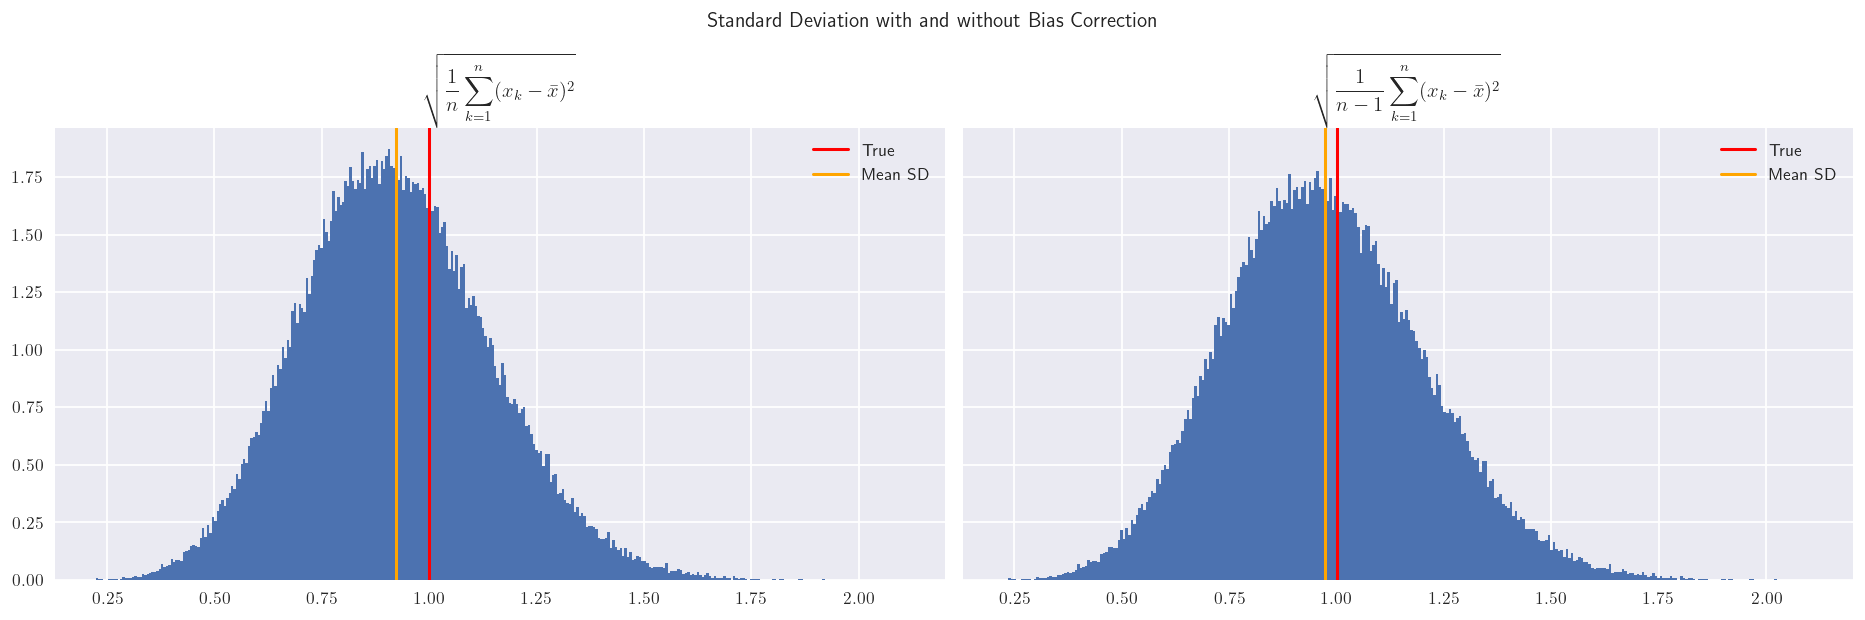

In [3]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm

# Use LaTeX and increase resolution
plt.rcParams['text.usetex'],  plt.rcParams['figure.dpi'] = True, 300

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Set random seed
np.random.seed(0)

# Define number of trials
trials = 100_000

# Generate normal rvs with mean 0 and variance 1
Z = norm.rvs(loc = 0, scale = 1, size = (trials, 10))

# Calculate the sd without bias correction
sd0 = np.apply_along_axis(np.std, 1, Z, ddof = 0)

# Calculate the sd with bias correction
sd1 = np.apply_along_axis(np.std, 1, Z, ddof = 1)

# Set up subplots
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, 
                       figsize = (15, 5), dpi = 125)

ax[0].hist(sd0, bins = int(np.sqrt(trials)), density = True)
ax[0].axvline(x = 1, color = 'red', label = 'True')
ax[0].axvline(x = np.mean(sd0), color = 'orange', label = 'Mean SD')

ax[0].legend()
ax[0].title.set_text(r'$\displaystyle\sqrt{\frac{1}{n}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

ax[1].hist(sd1, bins = int(np.sqrt(trials)), density = True)
ax[1].axvline(x = 1, color = 'red', label = 'True')
ax[1].axvline(x = np.mean(sd1), color = 'orange', label = 'Mean SD')

ax[1].legend()
ax[1].title.set_text(r'$\displaystyle\sqrt{\frac{1}{n - 1}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

# Give entire figure title
fig.suptitle('Standard Deviation with and without Bias Correction')

# Add padding
fig.tight_layout(pad = 1)

# Save the figure
plt.savefig(path + r'ex3-8.png')

plt.show()

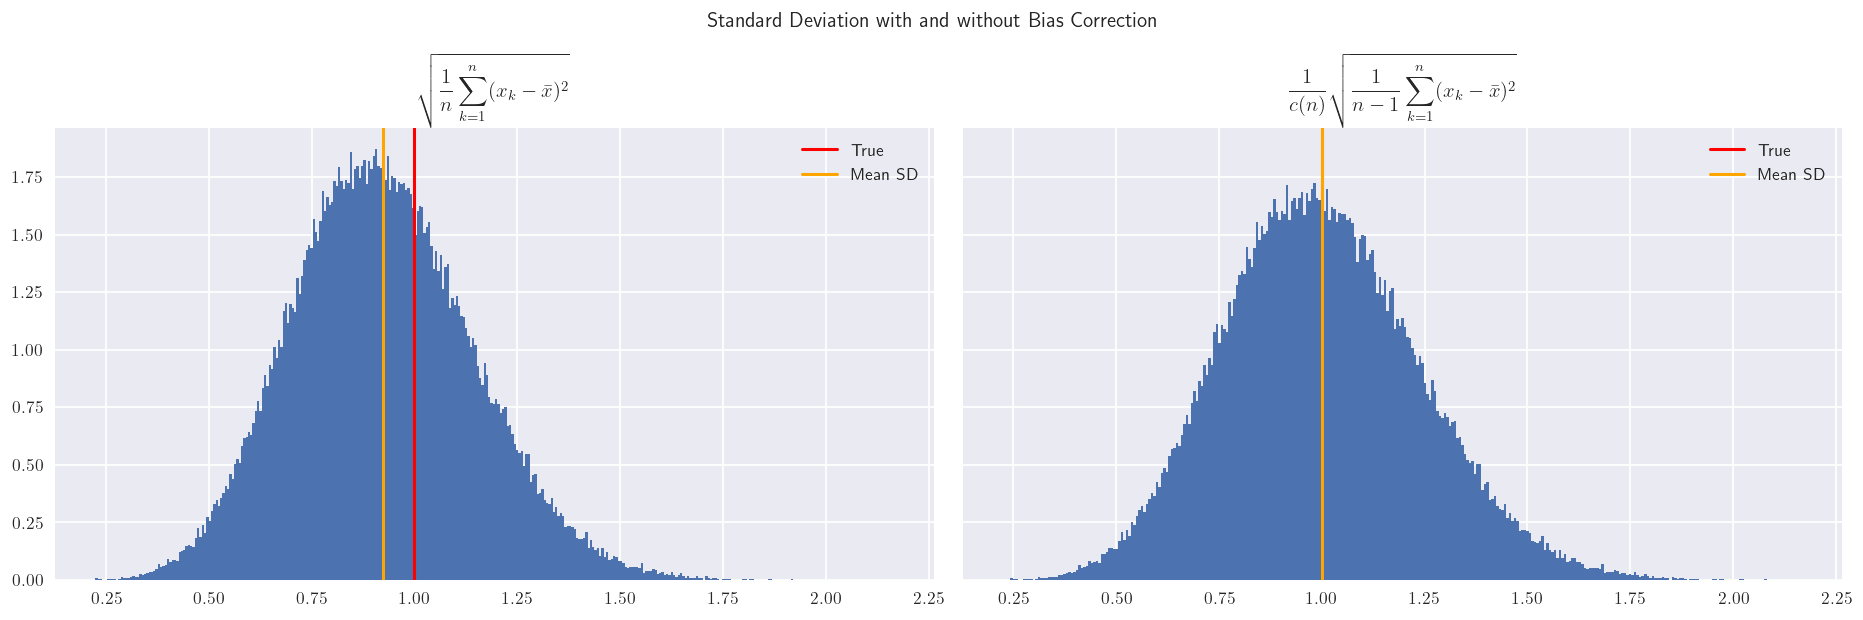

In [15]:
# Import modules
import numpy as np, matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import gamma

# Use LaTeX
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn-v0_8')

# Set random seed
np.random.seed(0)

# Define number of trials
trials = 100_000

# Generate normal rvs with mean 0 and variance 1
Z = norm.rvs(loc = 0, scale = 1, size = (trials, 10))

# Calculate the sd without bias correction
sd0 = np.apply_along_axis(np.std, 1, Z, ddof = 0)

# Get correct bias correction for normal distribution
# See https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
c = lambda n: np.sqrt(2/(n - 1)) * gamma(n/2)/gamma((n - 1)/2)

# Calculate the sd with correct bias correction
sd1 = 1/c(Z.shape[1]) * np.apply_along_axis(np.std, 1, Z, ddof = 1)

# Set up subplots
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, 
                       figsize = (15, 5), dpi = 125)

ax[0].hist(sd0, bins = int(np.sqrt(trials)), density = True)
ax[0].axvline(x = 1, color = 'red', label = 'True')
ax[0].axvline(x = np.mean(sd0), color = 'orange', label = 'Mean SD')

ax[0].legend()
ax[0].title.set_text(r'$\displaystyle\sqrt{\frac{1}{n}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

ax[1].hist(sd1, bins = int(np.sqrt(trials)), density = True)
ax[1].axvline(x = 1, color = 'red', label = 'True')
ax[1].axvline(x = np.mean(sd1), color = 'orange', label = 'Mean SD')

ax[1].legend()
ax[1].title.set_text(r'$\displaystyle \frac{1}{c(n)}\sqrt{\frac{1}{n - 1}\sum_{k = 1}^n (x_k - \bar{x})^2}$')

# Give entire figure title
fig.suptitle('Standard Deviation with and without Bias Correction')

# Add padding
fig.tight_layout(pad = 1)

plt.show()

In [3]:
# Import modules
import numpy as np
from scipy.stats import norm, t

# Say true values are mu = 0 and sigma = 1
mu, sigma = 0, 1

# Set random seed
np.random.seed(0)

# Say sample of size 15
sample_size = 15

# Generate sample
Z = norm.rvs(loc = mu, scale = sigma, size = sample_size)

# Set significance level
alpha = 0.05

# Calculate x_bar and s
x_bar, s = np.mean(Z), np.std(Z, ddof = 1)

# Calculate lower and upper t-values
t_lower = t.ppf(alpha/2, df = sample_size - 1)
t_upper = t.ppf(1 - alpha/2, df = sample_size - 1)

# Calculate theoretical confidence interval
lower_bound_theoretical = x_bar + s/np.sqrt(sample_size) * t_lower
upper_bound_theoretical = x_bar+ s/np.sqrt(sample_size) * t_upper

# Let's calculate experimental confidence interval

# Select large number of trails
trials = 100_000

# We assume independent samples from shifted and scaled t-distribution
T = t.rvs(loc = x_bar, scale = s/np.sqrt(sample_size), df = sample_size - 1, size = trials)

# Calculate experimental confidence interval
lower_bound_experimental = np.quantile(T, q = alpha/2)
upper_bound_experimental = np.quantile(T, q = 1 - alpha/2)

print(f'Using theoretical process the confidence interval is ({lower_bound_theoretical:.3f}, {upper_bound_theoretical:.3f}).\n')
print(f'Using experimental process the confidence interval is ({lower_bound_experimental:.3f}, {upper_bound_experimental:.3f}).')

Using theoretical process the confidence interval is (0.204, 1.170).

Using experimental process the confidence interval is (0.206, 1.171).
